In [22]:
#Import Pandas and Numpy
import pandas as pd
import numpy as np

#Import matplotlib and sattermatrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Import Seaborn
import seaborn as sns
sns.set()

#Import Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Import libraries for metrics & reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [23]:
#Load the Dataset
df_train=pd.read_csv('titanic.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#View Shape
df_train.shape

(891, 12)

In [25]:
#Check frequency of categorical feature class
#See different values in sex column
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
#See different values in survived column
df_train['Survived'].value_counts(1) #normalized=1

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [27]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
#See different values in embarked column
df_train['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
#Check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df_train.shape

(891, 12)

In [31]:
#Drop unnecessary feature
df_train=df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
df_train.groupby(['Pclass']).mean() 

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [44]:
def ageapprox(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        elif Pclass==3:
            return 25
    else:
        return Age  

In [45]:
df_train['Age']=df_train[['Age','Pclass']].apply(ageapprox,axis=1)

In [46]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [48]:
#Object signifies they are categorical/string type data
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [49]:
#One hot encoding
df_train_dummied=pd.get_dummies(df_train,columns=['Sex','Embarked'],drop_first=True)
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,25,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,25,0,0,7.9250,0,0,1
3,1,1,38,1,0,53.1000,0,0,1
4,0,3,25,0,0,8.0500,1,0,1


<AxesSubplot:>

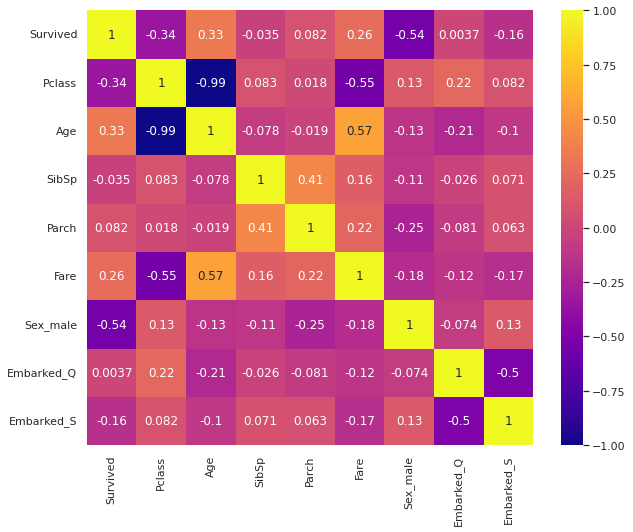

In [50]:
#Check between correlation between pairs of idependent features
plt.figure(figsize=(10,8))
sns.heatmap(df_train_dummied.corr(),vmin=-1,vmax=1,cmap='plasma',annot=True)

In [51]:
x=df_train_dummied.drop(['Survived'],axis=1)
y=df_train_dummied['Survived']

In [52]:
#Split dataset in training and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 8)
(268, 8)
(623,)
(268,)


In [55]:
#Instantiate the classifier
logreg=LogisticRegression()

In [56]:
#Train classifier
logreg.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred=logreg.predict(x_test)

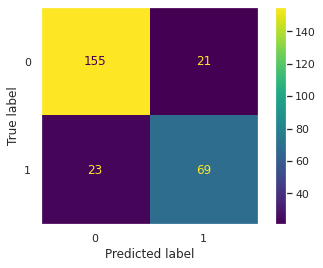

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test,y_test)
plt.grid();

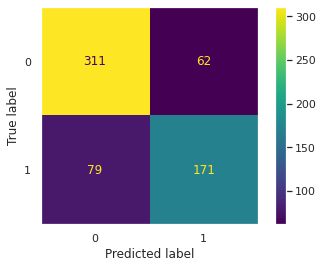

In [66]:
plot_confusion_matrix(logreg,x_train,y_train)
plt.grid();

In [61]:
accuracy_score(y_test,y_pred)

0.835820895522388

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       176
           1       0.77      0.75      0.76        92

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



In [63]:
logreg.coef_

array([[-3.75592622e-01,  7.29690352e-02, -2.24770012e-01,
        -2.06954604e-02,  1.80015990e-03, -2.45915227e+00,
         9.29335674e-03, -2.39981982e-01]])

In [64]:
logreg.intercept_

array([0.01069867])

In [65]:
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [67]:
logreg.predict_proba(x_test) #Probability prediction foreach passenger whether they will survive

array([[0.43232357, 0.56767643],
       [0.87818927, 0.12181073],
       [0.84912965, 0.15087035],
       [0.72691818, 0.27308182],
       [0.82746662, 0.17253338],
       [0.76919044, 0.23080956],
       [0.87846101, 0.12153899],
       [0.32713751, 0.67286249],
       [0.80666993, 0.19333007],
       [0.22535792, 0.77464208],
       [0.77316114, 0.22683886],
       [0.90061388, 0.09938612],
       [0.84910754, 0.15089246],
       [0.87830717, 0.12169283],
       [0.57229108, 0.42770892],
       [0.87848503, 0.12151497],
       [0.87419603, 0.12580397],
       [0.77331896, 0.22668104],
       [0.60236904, 0.39763096],
       [0.33290099, 0.66709901],
       [0.7741069 , 0.2258931 ],
       [0.52425113, 0.47574887],
       [0.8782334 , 0.1217666 ],
       [0.85043182, 0.14956818],
       [0.87706068, 0.12293932],
       [0.77739501, 0.22260499],
       [0.77331896, 0.22668104],
       [0.90158266, 0.09841734],
       [0.77331896, 0.22668104],
       [0.60009239, 0.39990761],
       [0.